# **Data Visualization Project on AI Adoption in Governance in Developing Countries**

**OJOBO AGBO EJE**

# **INTRODUCTION**

Artificial intelligence leverages computers and machines to mimic the problem-solving and decision-making capabilities of the human mind. With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy, it is expected that many countries would have adopted AI in the delivery of public service to their citizens.

Although most developed countries are adopting AI swiflty, research shows that many countries, especially in Africa and Asia are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

# Project Aim
 The aim of this project is to ascertain how ready governments in developing nations are to implement AI in the delivery of public service to their citizens, with a focus on certain factors.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

Oxford Insights is a U.K based organizations that help governments around the world to increase their impact.


**Existing Literature on Artificial Intelligence Adoption**


With the high potential of artificial intelligence to provide solutions in different sectors of the economy, ranging from business to education, aviation, health, service delivery, etc, one will assume that its adoption will be quickly embraced.

Previous research have pointed out that this is not the case, pointing out certain factors that could support or hinder the adoption of Artificial Intelligence.

**Some of the existing literature are quoted:**

1. "Despite the enormous potential of artificial intelligence (AI), many public organizations struggle to adopt this technology. Simultaneously, empirical research on what determines successful AI adoption in public settings remains scarce."  [(Oliver Neumann, etal,2022)](https://https://colab.research.google.com/drive/10PxEXExgKmmVRzoLGuPAks-R1Ep93Mtu#scrollTo=-6oOiQ1zmIfS&line=2&uniqifier=1)

2. "Factors influencing adoption at the individual level were related to trust, security, purchase price, intrinsic motivation, social influence, utilitarian benefit whereas at the organizational level, it was related to the technical competencies, strategic road mapping for AI, top management support and the digital maturity of the organization." [(Jayanthi Radhakrishnan, etal,2020)](https://link.springer.com/chapter/10.1007/978-3-030-64849-7_9)

3. "Despite the current popularity of artificial intelligence (AI) and a steady increase in publications over time, few studies have investigated AI in public contexts. As a result, assumptions about the drivers, challenges, and impacts of AI in government are far from conclusive." [(Averill Campion, etal,2022)](https://journals.sagepub.com/doi/full/10.1177/0894439320979953)

My project focuses on developing nations.

**Importing Relevant Libraries**

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
!pip install pandas geopandas matplotlib openpyxl
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
!pip install plotly pandas
import plotly.express as px
!pip install mapclassify
import mapclassify
from google.colab import data_table
data_table.enable_dataframe_formatter()

# **DATA COLLECTION AND EXPLORATION**

**Data Sources**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com:
Data: [OpenData](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/map/?flg=en-us&location=2,42.07882,0.00845&basemap=jawg.light)

Some variables and their invdividual sources:

AI Papers:
Data: [SJR](https://docs.google.com/spreadsheets/d/1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb/export?format=csv), Year: 2022

Foundational I.T Infrastructure:
Data: [World Bank GovTech Maturity Index](https://www.worldbank.org/en/programs/govtech/2022-gtmi), Year: 2022

Open Data:
Data: [Global Data Barometer](https://globaldatabarometer.org/module/governance/), Year: 2022

Research and Development Spending:
Data: [UNESCO](http://data.uis.unesco.org/), Year: 2020-2022

Percentage Poverty per Country:
Data: [Wikipedia](https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty), Year: 2018-2022

Telecommunications Infrastructure:
Data: [UN e-Government Survey](https://https://publicadministration.un.org/en/Research/UN-e-Government-Surveys)

Graduates in STEM:
Data:
[UNESCO](https://http://data.uis.unesco.org/)

**Factors to be Considered in my project**

The variables/factors that were considered:

1. Graduates in STEM: This is the percentage of graduates that graduated from Science, Technology and Mathematics programs (STEM) as compared to other general study programs.
2. Foundational IT Infrastructure: How much infrastructure does the country have to support technological advancements. A score given by the World Bank based on factors such as Availability of Internet Connectivity, Data centers and cloud services, the extent of which the government is digitized, and the strength of cybersecurity measures, (GTMI score)
3. Adoption of Emerging Technologies
4. AI research papers: The number of Citable AI papers by country published with citations.
5. Government responsiveness to change: An index measured by Global Competitiviness report in 2019, which takes into consideration factors like: Policy adoption, support for innovation and crisis management
6. R&D Spending: Measured by global innovation index, it is a measure of R&D spending both by governments and private corporations or groups, here the data is log transformed to normalize the data and reduce variability and make the relations more obvious
7. Poverty Rate: The Poverty rate was measured by the percentatge of the population of the country that earns less than $2.60 per day.

# **DATA PROCESSING**

**Data Processing on World Map**

Data showing the country boundaries was collected from Open Data Soft Website

In [ ]:
! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
wd_map = gpd.read_file('world-administrative-boundaries.shp')

**Data Exploration on the World Map**

Before analyzing, I want to clean the data for by renaming some columns from the world map.

In [ ]:
wd_map=wd_map[['name','geometry']]
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-180-9303018f7d74>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Rename two countries
renamed_countries = {'CÃ´te d\'Ivoire': 'Ivory Coast', 'Libyan Arab Jamahiriya': 'Libya', }

# Apply the renaming
for old_name, new_name in renamed_countries.items():
    if old_name in wd_map:
        index_to_update = wd_map.index(old_name)
        wd_map[index_to_update] = new_name

**Countries under consideration (Developing countries, Mainly Africa and Asia areas)**

In [ ]:
dev_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
                     'Comoros', 'Congo', "Ivory Coast", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
                     'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
                     'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
                     'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia',
                     'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq',  'Jordan',
                 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
                     'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines',  'Saudi Arabia',
                     'Sri Lanka', 'Syria', 'United Republic of Tanzania', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
                     'Uzbekistan', 'Vietnam', 'Yemen']


wd_dev_map = wd_map[wd_map['Country'].isin(dev_countries)]

**Data Processing for AI Readiness Factors Being Considered**

Cleaning out the unnecessary variables, leaving only the ones required for my project based on the factors I am considering.

In [ ]:
#Import the and clean data on AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')
ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(dev_countries)]
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure',
                                                   'Adoption of Emerging Technologies','Government responsiveness to change','R&D Spending (log transformation)']]
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]

**Data Processing on Poverty Rate Across the World**

The Poverty rate was measured by the percentatge of the population that lives on less than $2.60 per day

In [ ]:
#Import the Data on Poverty Rate Across the World
poverty_rate = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',
                            match="Country")[1]
poverty_rate = poverty_rate[poverty_rate['Country'].isin(dev_countries)]
poverty_rate=poverty_rate.iloc[1:, :]
poverty_rate = poverty_rate[['Country','World Bank[2]']]
poverty_rate.rename(columns={'World Bank[2]': '$2.60'}, inplace=True)
poverty_rate['$2.60'] = poverty_rate['$2.60'].str.replace(',', '.', regex=False)
poverty_rate['$2.60'] = poverty_rate['$2.60'].str.replace('%', ' ', regex=False)
poverty_rate['$2.60'] = pd.to_numeric(poverty_rate['$2.60'])

**Data Processing on AI Cited Papers Across the Countries**

In [ ]:
sheet_id = '1vllmcsRcV0O5x9gE1Kmc1WMxalugU7Sb'
sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
ai_paper= pd.read_csv(sheet_url)
ai_paper=ai_paper.iloc[1:, :]
ai_paper = ai_paper[ai_paper['Country'].isin(dev_countries)]
ai_paper = ai_paper[['Country','Citable documents']]

In [ ]:
# Merging datasets
wd_dev_map_ai_readiness = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
wd_dev_map_ai_paper = pd.merge(wd_dev_map_ai_readiness, ai_paper, on='Country')
wd_dev_map_ai_readiness_poverty_rate = pd.merge(wd_dev_map_ai_paper, poverty_rate, on='Country')


In [ ]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Ivory Coast', 'Democratic Republic of the Congo', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
    'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']


# **DATA ANALYSIS**

**1. CORRELATION MATRIX**

Correlation matrix to show the correlation coefficients between the different factors we took into consideration.

In [ ]:
heatmap = sns.heatmap(wd_dev_map_ai_readiness_poverty_rate.corr().round(2), cmap="RdYlGn", annot=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Uganda'



**Observation from Correlation Matrix:**

1. There is a strong relationship between R&D Spending and Adoption of Emerging Technology. **Which shows that a country spending in Research and Development shows their willingness to adopt emerging technology.**

2. There is not much relationship between the number of Graduates in STEM and a country's Number of AI citable documents. **That means even if a country has more graduate students interested from STEM, it doesn't mean they will go on to do research in A.I.**

3. There is negligible relationship between the number of Graduates in STEM and a country's Foundational I.T Infrastructure. **One would think that if a country has Foundational I.T Infrastructure, more students would go into STEM.**

4. Poverty (<$2.60 daily income) shows a negative correlation with all other factors. **In other words, when the other variables (Foundational IT Infrastructure, Adoption of Emerging Technologies, etc) improves, a countries poverty level decreases.**

**2. SCATTERPLOT**

Scatterplots to compare a country's Government Responsiveness to Change, their Adoption of Emerging Technologies and Foundational IT Infrastructure. Then visualize their relationships, identify patterns, and detect outliers.


In [ ]:
wd_dev_map1['Symbol'] = wd_dev_map1['Country'].apply(lambda x: 'triangle' if x in african_countries else 'circle')
wd_dev_map1['Size'] = 5

fig = px.scatter(wd_dev_map1,
                 x='Adoption of Emerging Technologies',
                 y='Government responsiveness to change',
                 color='Foundational IT infrastructure',
                 symbol='Symbol',
                 size='Size',
                 hover_data=['Country'],
                 width=1500, height=700)

fig.update_layout(
    title='Scatter Plot of Countries by Emerging Technologies and Government Responsiveness',
    xaxis_title='Adoption of Emerging Technologies',
    yaxis_title='Government Responsiveness to Change',
    font=dict(family="Arial, sans-serif", size=10, color="RebeccaPurple")
)


**Observation from Scatterplot:**

1. We found it interesting that overall, there was an upward trend, showing a positive relationship in Governments Responsiveness to change and their Adoption of Emerging Technology.

2. Also, there wasn't an obvious pattern showing a country's Foundational I.T Infrastructure and Adoption of Emerging Technology

3. Overall, countries in Africa showed a government responsiveness to change of less than 50, which also reflected in their Adoption of Emerging Technology, as symbolised by the cluster of circle shapes.

4. Mauritania appeared to be an outlier, showing very low government responsiveness despite average adoption of Emerging Technologies etc

**3. Comparing Poverty Rate and Government Responsiveness To Change**

Since our correlation heatmap initially showed that poverty rate has a negative correlation with other factors. We want to check the trend of Governments Responsivesness to Change against poverty rate across countries.


In [ ]:
fig = px.scatter(wd_dev_map_ai_readiness_poverty_rate,
                 x='Government responsiveness to change',
                 y='$2.60',
                 color='$2.60',
                 hover_data=['Country'],
                 width=1000, height=700)

fig.update_layout(
    title='Scatter Plot of Countries by Poverty Rate and Government Responsiveness',
    xaxis_title='Government responsiveness to change',
    yaxis_title='Poverty Rate',
    font=dict(family="Arial, sans-serif", size=10, color="RebeccaPurple")
)

**Observations**

1. We can see a downward trend, showing that generally, the higher a countries government responsiveness to change, the lower their poverty rate. **Which leads us to believe that as a country adopts change in factors like policy, technology and human development, their poverty rate will reduce.**

**4. Visual Representation of Poverty Rate Across the Considered Regions**

In [ ]:
poverty_rate_map = px.choropleth(poverty_rate,
                    locations=poverty_rate.columns[0],
                    locationmode='country names',
                    color=poverty_rate.columns[1], color_continuous_scale="Viridis",
                    title="Poverty Rate (%) per Country living on less than $2.60 per day")

poverty_rate_map.show()

**Observations on Poverty Rate**

1. The map shows a high poverty rate in countries around Africa, compared to the Asian and Middle Eastern Areas.

2. The countries with the highest poverty rate (South Sudan and Central Africa Republic, represented by the yellow colour) are reflective of the areas where many wars have happened over the last decade.

**5. Comparing Foundational IT infrastructure and Graduates of STEM**

Using a side by side map to compare Foundational IT infrastructure across countries to the Graduates in STEM, to compare if a country's IT infrastructure influences the number of graduates in STEM.




In [ ]:
wd_dev_map2 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
wd_dev_map2 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


<Axes: >

[]

[]

<Axes: >

[]

[]

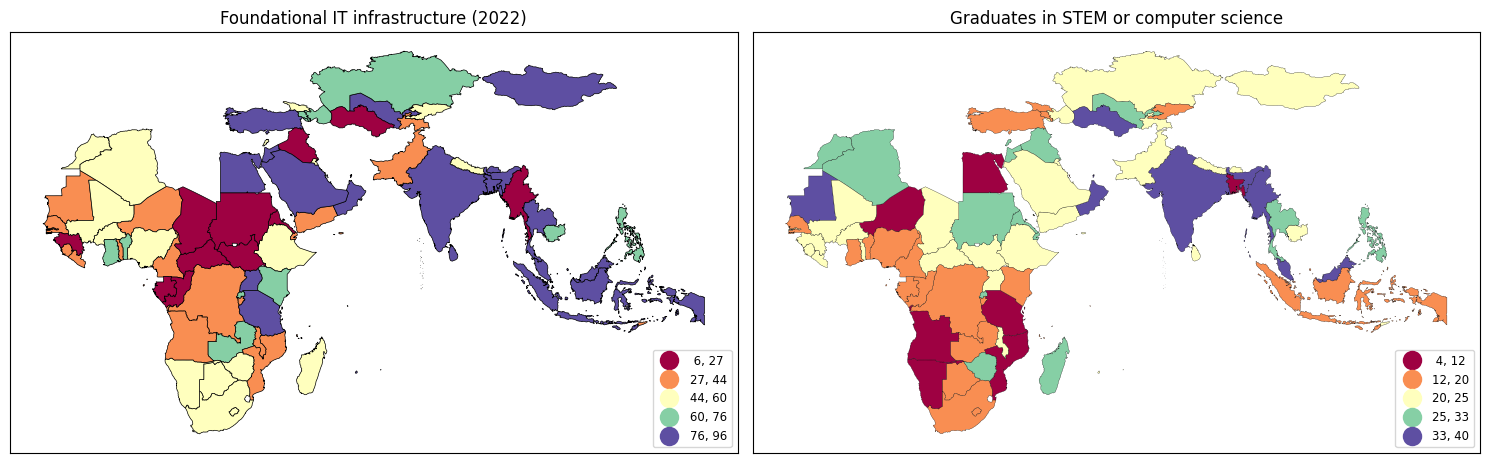

In [ ]:
#Plot Against Graduates in STEM

fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True)
wd_dev_map2.plot(ax=axs[0],column='Foundational IT infrastructure',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
axs[0].title.set_text("Foundational IT infrastructure (2022)")
axs[0].set_xticks([]); axs[0].set_yticks([])

wd_dev_map2.plot(ax=axs[1],column='Graduates in STEM or computer science',legend=True,cmap='Spectral',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
axs[1].title.set_text("Graduates in STEM or computer science")
axs[1].set_xticks([]); axs[1].set_yticks([])

**Observation**

1. Although countries like Mongolia in Asia and Saudi Arabia in the Middle East have good Foundational I.T Infrastructure, it doesn't reflect in the number of Graduates in STEM.

2. Compared to other regions, countries in Africa have poor IT infrastructure which also reflects in their number of Graduates from STEM programs.

**6. Citable AI research papers per country**

Number of AI research papers across countries. Scrolling into the Map shows the details for each *country*



In [ ]:
wd_dev_map3 = pd.merge(wd_dev_map, ai_paper, on='Country', how='outer', indicator=True)
wd_dev_map3 = pd.merge(wd_dev_map, ai_paper, on='Country', how='outer', indicator=True)
wd_dev_map4 = pd.merge(wd_dev_map3, ai_paper, on='Country', how='inner', indicator=False)

In [ ]:
ai_papers_map = px.choropleth(ai_paper,
                    locations=ai_paper.columns[0],
                    locationmode='country names',
                    color=ai_paper.columns[1],
                    hover_name=ai_paper.columns[1],
                    color_continuous_scale="reds",
                    range_color=[0, 5000],
                    title="Number of Citable AI Papers by Country (2022)")

ai_papers_map.show()

**Observation**

1. Overall, countries in Africa have low numbers of Citable papers on A.I (less than 1000), compared to countries in other regions, which points to the fact that overall, research in AI is low in Africa.  However, India has as many as 23,000 Citable papers on AI, which is reflective of the population.

2. Even countries in war torn regions in the Middle East are researching about AI.

**7. Government Responsivesness to Change**

How ready is a government willing to accept a change in policy, technology etc. We need to map Governments Responsivesness to Change across countries.


In [ ]:
wd_dev_map7 = pd.merge(wd_dev_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)
wd_dev_map8 = pd.merge(wd_dev_map7, ai_readiness_indicators, on='Country', how='inner', indicator=False)


<Axes: >

[]

[]

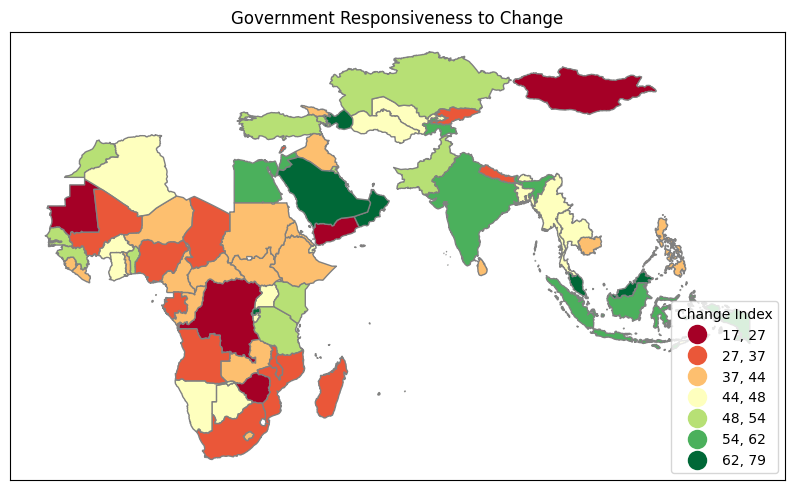

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_dev_map7.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([])
ax.set_yticks([])

**Observation**

1. Most countries in Africa have government with low responsiveness to change also have a low AI readiness index.


Is there a relationship between Adoption of Emerging Technology and a Government's Responsiveness to Change?

<Axes: xlabel='Adoption of Emerging Technologies', ylabel='Government responsiveness to change'>

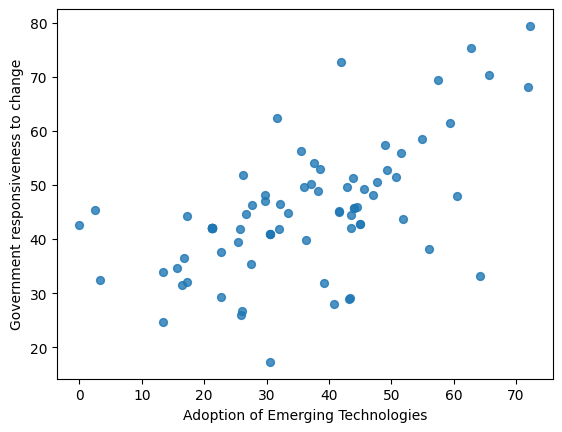

In [ ]:

ai_readiness_indicators.plot(kind='scatter', x='Adoption of Emerging Technologies', y='Government responsiveness to change', s=32, alpha=.8)


# **RECOMMENDATIONS AND LIMITATIONS**

**RECOMMENDATIONS**

These recommendations are country and region specific which can be effected in future work.

Governments should consider the following:

1. Strengthen STEM Education:
Invest in STEM education to cultivate a skilled workforce, vital for driving AI initiatives and fostering innovation in governance.Including incentivizing students going into STEM (scholarships, increased job certainty for STEM profesionals)

2. Government-Industry Collaboration:
Governments should foster collaboration between government and private industry for capacity building through workshops, training, and partnerships, enhancing officials' technological understanding.

3. Strategic IT Infrastructure:
Prioritize foundational IT infrastructure development, including secure data storage and high-speed internet, to provide a robust backbone for successful AI implementation.

4. Incentives for Innovation:
Government should introduce incentives such as funding and tax benefits to stimulate AI innovation, encouraging public-private collaboration to address specific governance challenges effectively.

5. Proactive Change Management:
Government should implement proactive change management strategies, including training programs and communication channels, to enhance government responsiveness, fostering a culture of adaptability and innovation.


**MISSING VALUES**

In carrying out this research project, some of the limitations we experienced include:

1. Data Integration Challenges: Obtaining data from diverse sources may have varying data formats, structures, and levels of completeness. The absence of standardized data formats across platforms led to difficulties in merging datasets, resulting in gaps and missing values.

**LIMITATIONS**

In carrying out this research project, some of the limitations we experienced include:

1. Poor representation of data:
We realized that in gathering our data, previous researchers didn't give specific information about the measures they used when collatings data.

2. Lack of data:
Since our data was collected from different sources, while some variables where available in one source, it could be missing in another, which made merging a bit difficult.

3. Data Availability and Quality:
Many of the countries have limited data on AI adoption, making it challenging to gather comprehensive and reliable information. Incomplete or inaccurate data could affect the validity of the study's conclusions and the ability to make broad generalizations about the continent.

4. Regional Variations:
The countries are vast and diverse with significant regional disparities in terms of infrastructure, population, and access to technology. We experienced struggle in capturing these regional variations, potentially leading to a lack of nuance in the findings.

5. Language and Cultural Diversity:
The linguistic and cultural diversity across may have posed challenges in terms of data collection and interpretation for the primary researchers, which affected survey responses and interviews, making it difficult to draw meaningful comparisons or identify common trends.

6. Technological Infrastructure:
The availability and quality of technological infrastructure, including internet access and electricity, vary widely across  countries. Limited infrastructure can hinder the adoption of AI and may skew research findings if not adequately accounted for.

7. Sample Bias:
The primary researchers did not give a representative sample of the countries for their study. Selection bias, where certain groups or regions are overrepresented (SouthEast Asia) or underrepresented (Africa), can limit the generalizability of the findings.

Decision-makers relying on some of the data from this research for strategic planning may face challenges since some crucial data points are unavailable, potentially limiting the effectiveness and accuracy.
